# Data preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
from scipy.stats import zscore

In [2]:
inva = pd.read_csv('Data/inva.csv', sep=';')
inva_children = pd.read_csv('Data/inva_children.csv', sep=';')
demos = pd.read_csv('Data/demos.csv', sep=';')
demos_children = pd.read_csv('Data/desmos_children.csv', sep=';')
benefits = pd.read_csv('Data/benefits.csv', sep=';')
inva

,Region,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,RK,563 086,609 780,626 740,627 163,637 217,651 924,662 544,680 025,695 253,695 131,696 825,711 786
1,Abay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24 272
2,Akmol,26 298,28 193,28 470,28 003,28 221,28 637,28 821,29 200,29 059,28 798,29 073,28 948
3,Aktiub,19 667,21 451,22 181,22 256,22 909,24 040,25 008,25 962,27 044,27 401,27 694,28 618
4,Almat,62 919,69 584,71 144,70 282,69 968,68 248,67 280,68 259,68 775,67 251,67 237,43 668
5,Atyr,16 268,17 554,18 301,18 888,19 438,20 239,21 003,21 748,22 886,23 066,23 679,24 446
6,Zap-K,23 547,25 019,25 408,24 753,24 201,24 036,23 684,24 023,24 401,24 272,24 213,24 351
7,Zham,36 021,38 375,39 622,40 365,41 377,42 570,43 301,44 679,45 880,45 805,45 777,45 426
8,Zheti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24 364
9,Karag,56 994,61 704,63 385,62 239,63 102,64 329,65 552,66 845,67 763,67 384,67 795,56 106


# Functions

In [4]:
def boxplot(df):
    figure(figsize=(30, 8), dpi=80)
    melted_df = pd.melt(df, id_vars=['Region'], var_name='Year', value_name='Value')
    melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')
    melted_df['Z_Score'] = melted_df.groupby('Region')['Value'].transform(zscore)
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.boxplot(x='Region', y='Z_Score', data=melted_df, ax=ax)
    plt.title('Boxplots for Regions (z-score normalized)')
    plt.show()

def barplot(df, x, y):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x=x, y=y)

# EDA 1

### Population of disabled people (general)

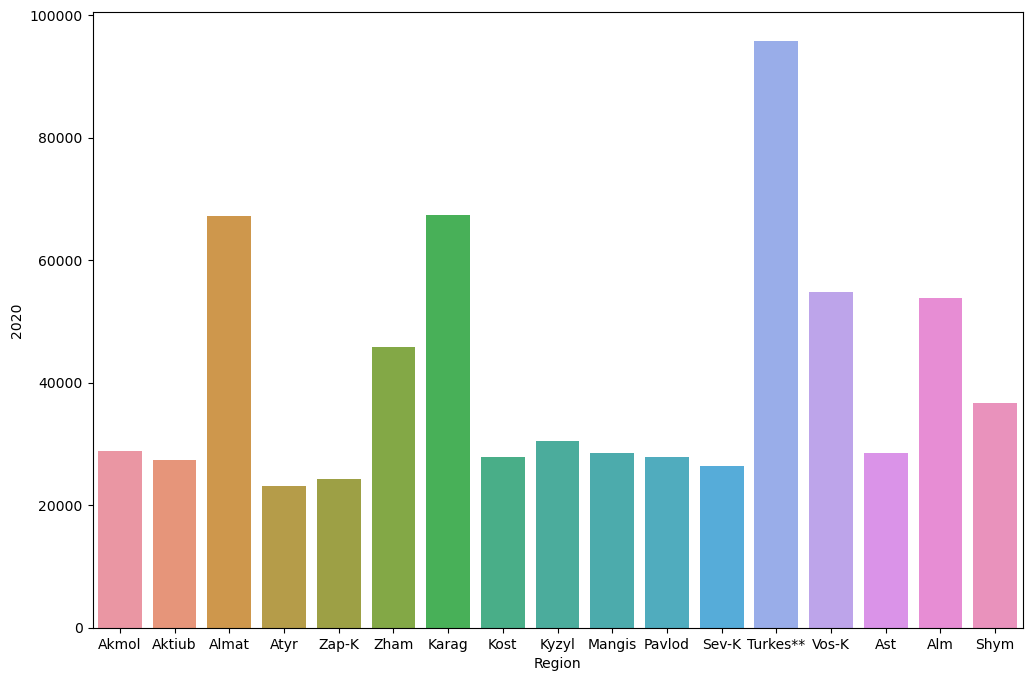

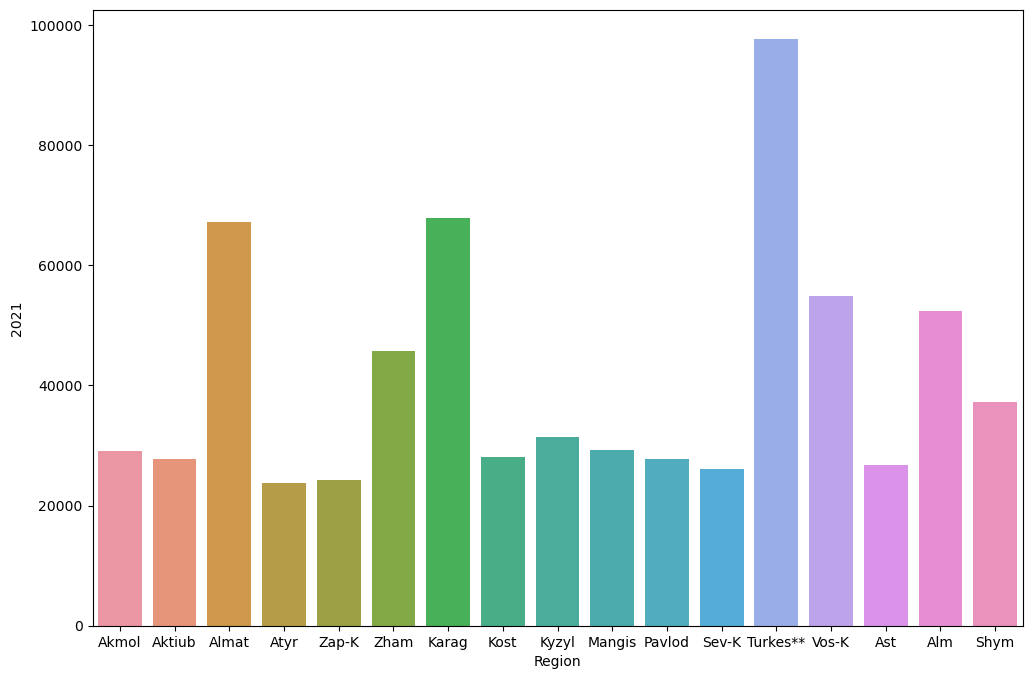

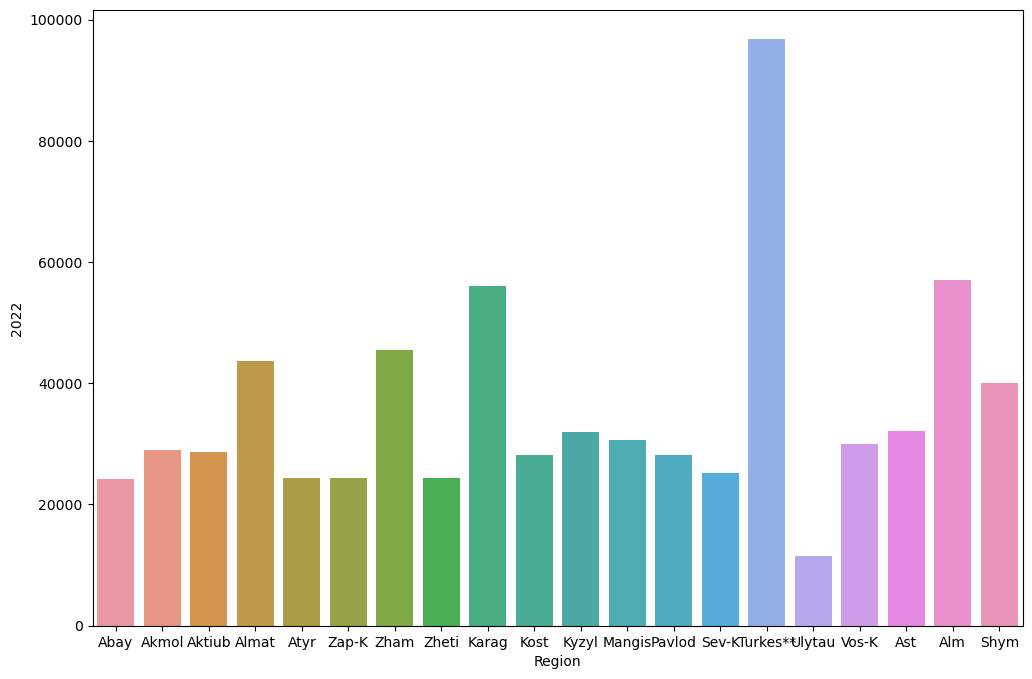

In [5]:
for col in inva.columns[1:]:
    inva[col] = pd.to_numeric(inva[col].str.replace(' ', ''), errors='coerce')

for year in range(2020, 2023):
    temp = inva[['Region', str(year)]].drop(index=inva.index[0], axis=0).dropna()
    barplot(temp, x='Region', y=str(year))

<Figure size 2400x640 with 0 Axes>

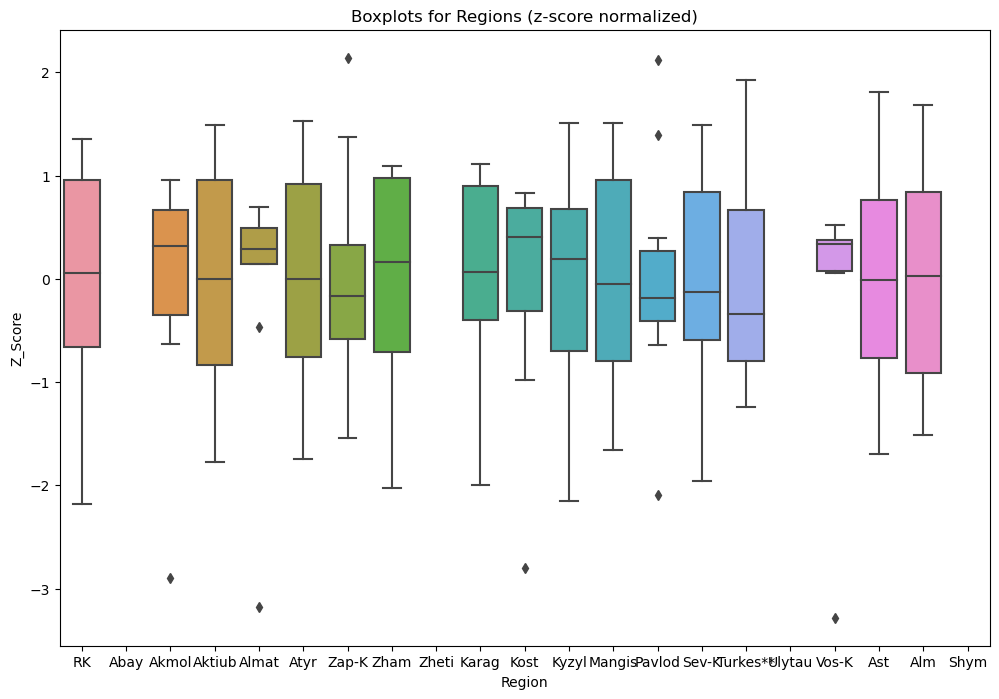

In [6]:
boxplot(inva)

### Combining regions to 4 main groups

In [7]:
inva_c = pd.DataFrame()
inva_c['Zapad'] = inva[(inva['Region']=='Mangis')|(inva['Region']=='Aktiub')|(inva['Region']=='Atyr')|(inva['Region']=='Zap-K')].sum()
inva_c['Vostok'] = inva[(inva['Region']=='Abay')|(inva['Region']=='Zheti')|(inva['Region']=='Vos-K')].sum()
inva_c['Sever'] = inva[(inva['Region']=='Kost')|(inva['Region']=='Akmol')|(inva['Region']=='Pavlod')|(inva['Region']=='Sev-K')].sum()
inva_c['Center'] = inva[(inva['Region']=='Karag')|(inva['Region']=='Ulytau')].sum()
inva_c['Iug'] = inva[(inva['Region']=='Kyzyl')|(inva['Region']=='Almat')|(inva['Region']=='Zham')|(inva['Region']=='Turkes**')].sum()
inva_c['Almaty'] = inva[inva['Region']=='Alm'].sum()
inva_c['Astana'] = inva[inva['Region']=='Ast'].sum()
inva_c['Shymkent'] = inva[inva['Region']=='Shym'].sum()
inva_c = inva_c.T
inva_c = inva_c.drop('Region', axis=1)
inva_c =inva_c.reset_index().rename(columns={'index': 'Region'})
inva_c


,Region,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Zapad,74697.0,81464.0,84402.0,85558.0,87251.0,90673.0,93403.0,97278.0,102046.0,103308.0,104780.0,108057
1,Vostok,54730.0,57560.0,58165.0,57124.0,57073.0,57080.0,56704.0,56920.0,56543.0,54905.0,54838.0,78654
2,Sever,104810.0,112712.0,114485.0,112067.0,112454.0,112568.0,111748.0,112396.0,112145.0,110907.0,111089.0,110485
3,Center,56994.0,61704.0,63385.0,62239.0,63102.0,64329.0,65552.0,66845.0,67763.0,67384.0,67795.0,67536
4,Iug,216187.0,236420.0,244127.0,246498.0,251636.0,257361.0,261478.0,233690.0,238898.0,239434.0,241978.0,217889
5,Almaty,41063.0,42607.0,43510.0,44196.0,45436.0,47967.0,49511.0,51679.0,53706.0,53900.0,52438.0,56956
6,Astana,14605.0,17313.0,18666.0,19481.0,20265.0,21946.0,24148.0,25719.0,27518.0,28607.0,26730.0,32182
7,Shymkent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35498.0,36634.0,36686.0,37177.0,40027


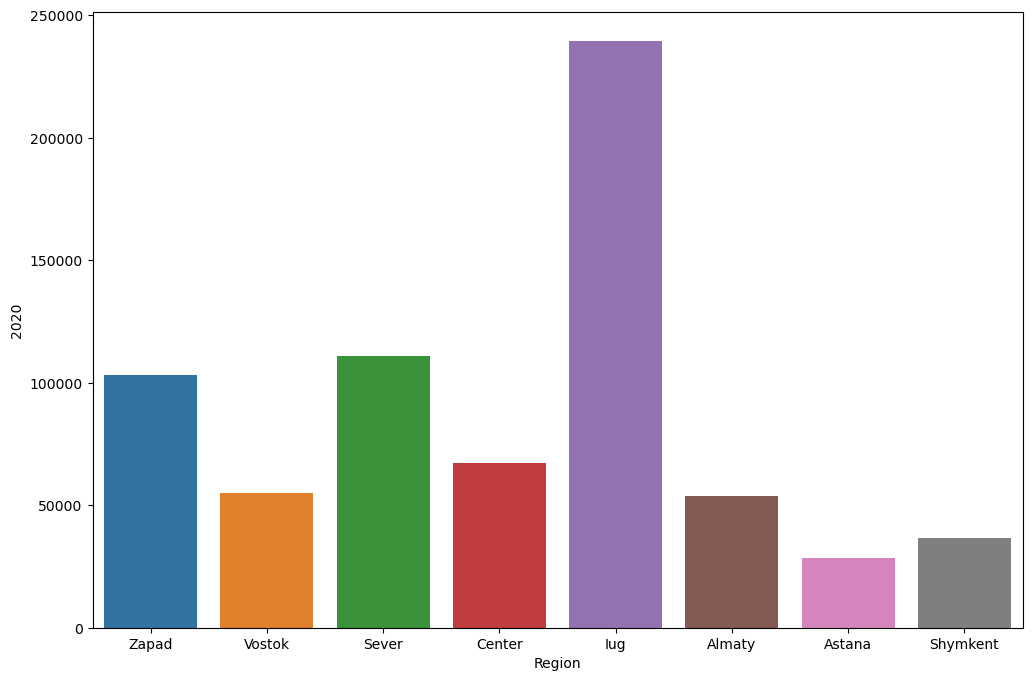

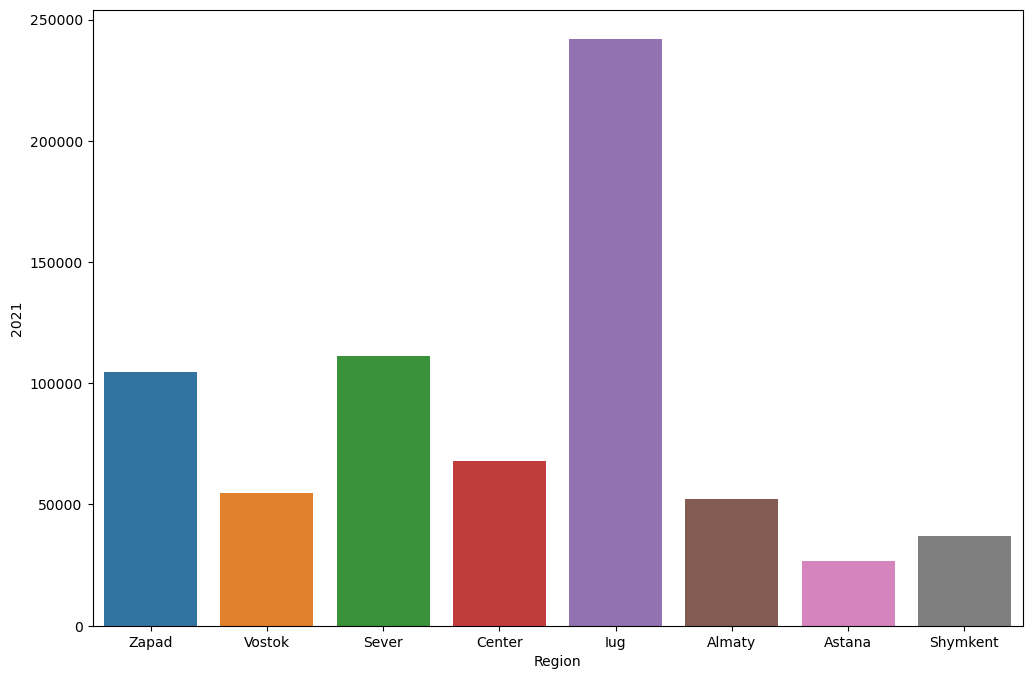

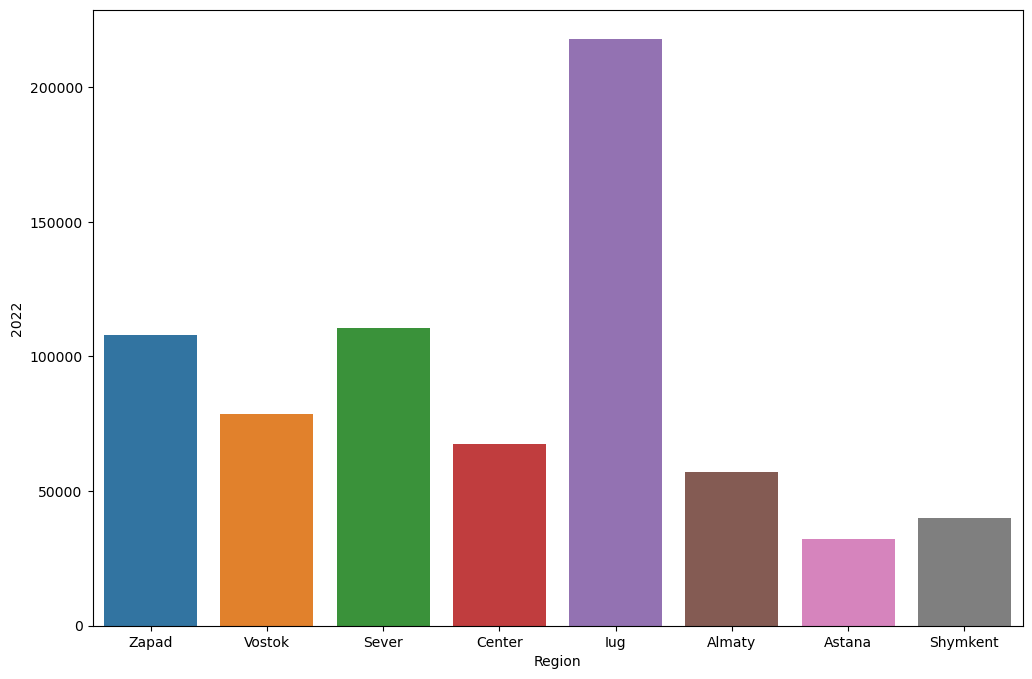

In [8]:
for year in range(2020, 2023):
    temp = inva_c[['Region', str(year)]].dropna()
    barplot(temp, x='Region', y=str(year))

<Figure size 2400x640 with 0 Axes>

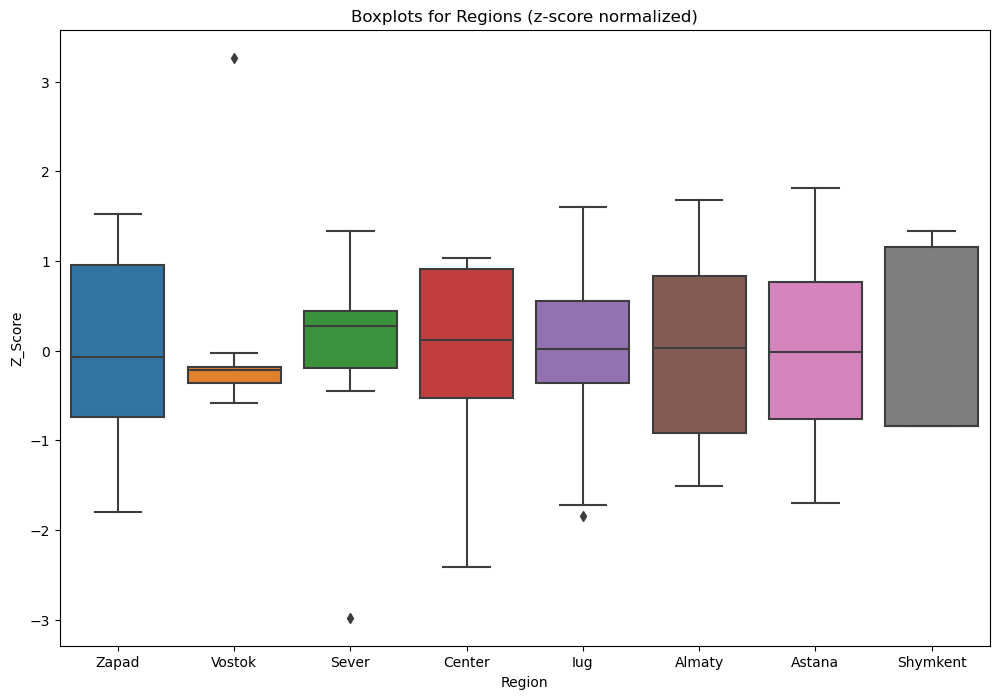

In [9]:
boxplot(inva_c)

### Ratio of disabled people (general)

In [10]:
inva_ratio = inva.copy()

def ratio(inva, demos, inva_ratio):
    try:
        num_inva = inva.drop(['Region'], axis=1).fillna(0).copy()
        num_demos = demos.drop(['Region'], axis=1).fillna(0).copy()

        for col in demos.columns[1:]:
            num_demos[col] = pd.to_numeric(num_demos[col].str.replace(' ', ''), errors='coerce')
        for column in inva.columns[1:]:
            inva_ratio[column] = num_inva[column] / num_demos[column]
    except:
        for column in inva.columns[1:]:
            inva_ratio[column] = inva[column] / demos[column]

    return inva_ratio

inva_ratio = ratio(inva, demos, inva_ratio)

inva_ratio.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,21.000000
mean,0.033748,0.036149,0.036687,0.036214,0.036283,0.036639,0.035822,0.037456,0.037855,0.037487,0.037228,0.037626
std,0.006267,0.006641,0.006697,0.006375,0.006461,0.006201,0.012256,0.006338,0.006398,0.006497,0.006992,0.006881
min,0.020949,0.023306,0.023988,0.023920,0.023763,0.025151,0.000000,0.024956,0.025518,0.025179,0.022568,0.024837
25%,0.029058,0.031954,0.032605,0.033263,0.033434,0.034043,0.032223,0.034138,0.034326,0.033370,0.033020,0.034438
50%,0.034428,0.036571,0.037063,0.036911,0.037183,0.036991,0.036900,0.037366,0.037600,0.037180,0.036979,0.036843
75%,0.036263,0.038936,0.039662,0.039663,0.038411,0.038469,0.039141,0.039872,0.040841,0.040421,0.040203,0.040954
max,0.046466,0.049877,0.050719,0.049913,0.049913,0.049498,0.061873,0.048816,0.049156,0.048940,0.049272,0.051740


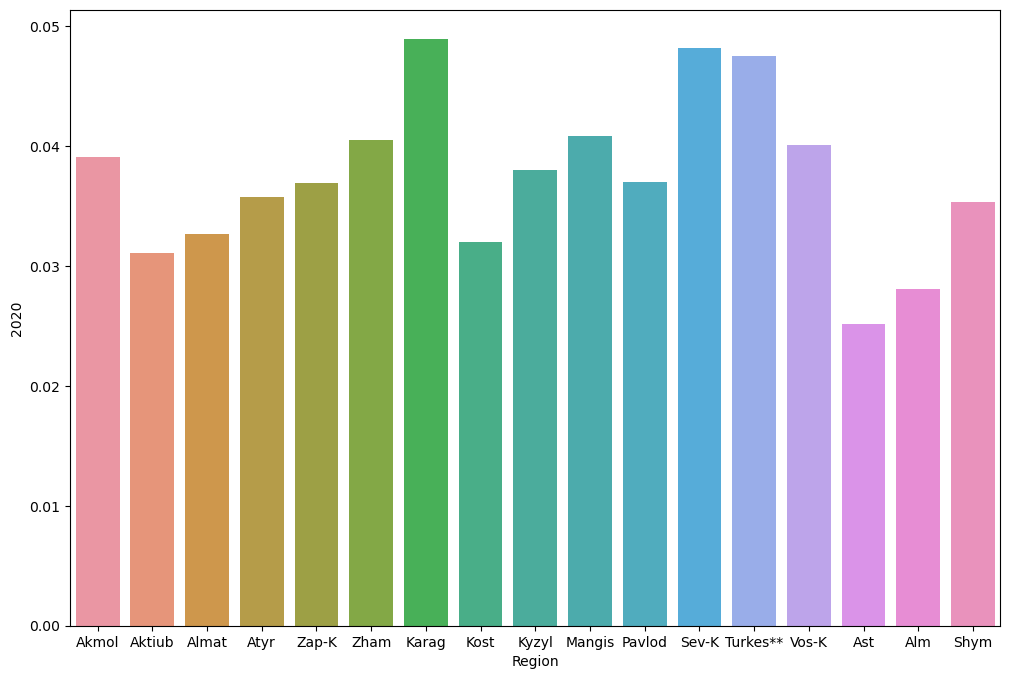

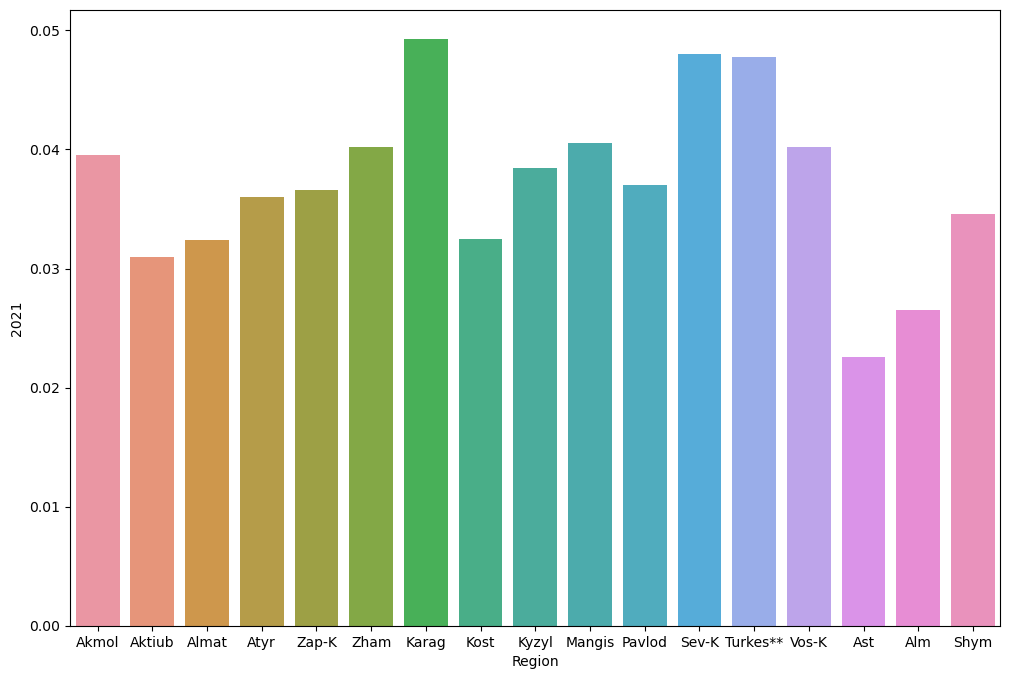

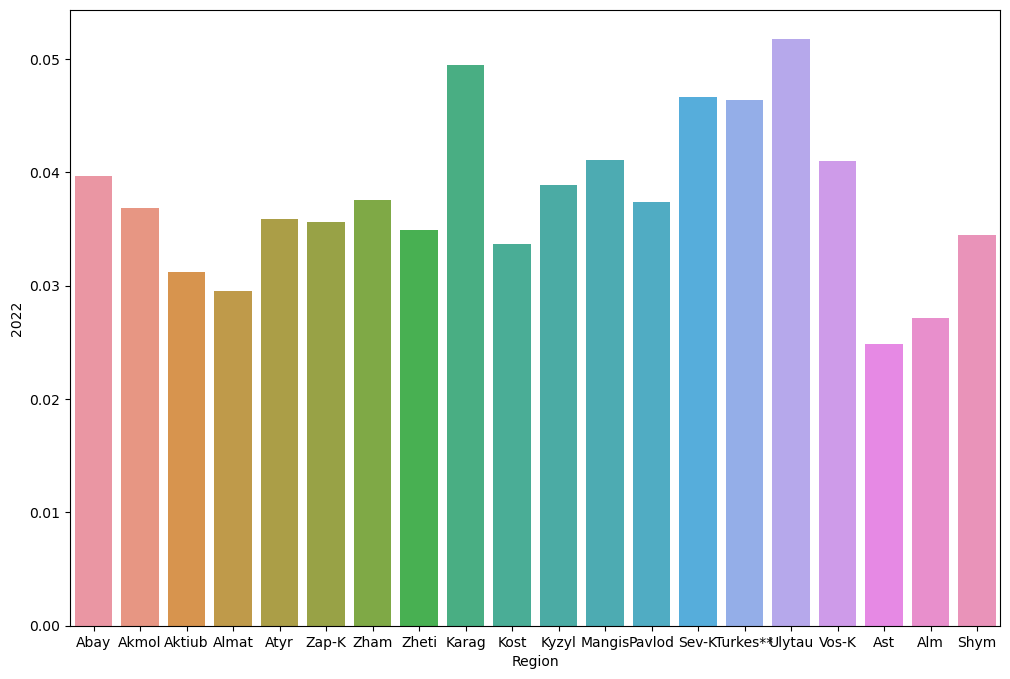

In [11]:
for year in range(2020, 2023):
    temp = inva_ratio[['Region', str(year)]].drop(index=inva_ratio.index[0], axis=0).dropna()
    barplot(temp, x='Region', y=str(year))

<Figure size 2400x640 with 0 Axes>

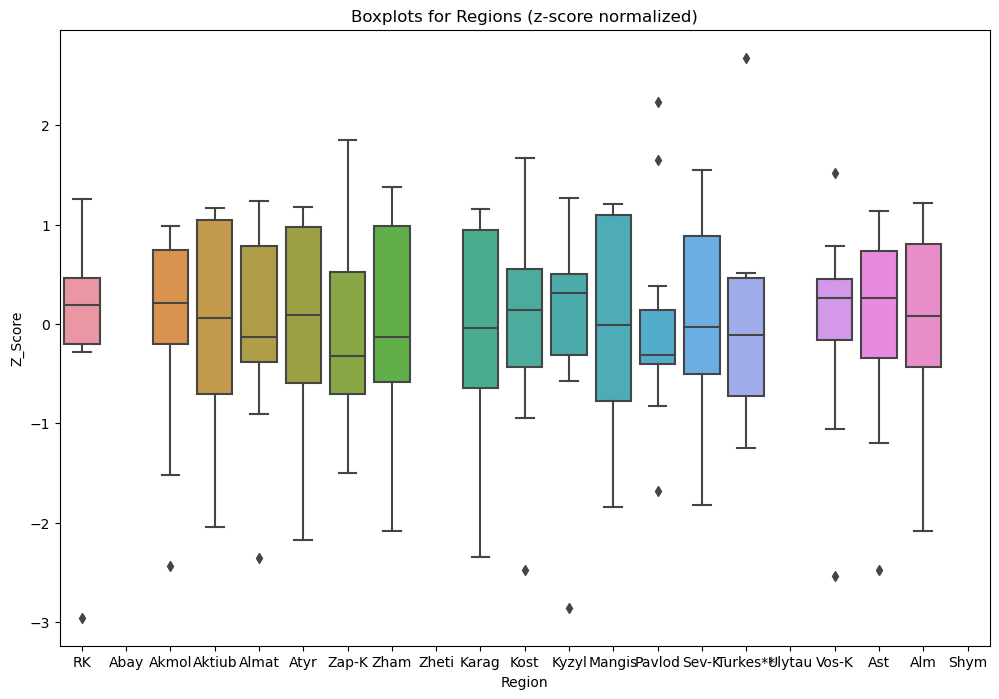

In [12]:
boxplot(inva_ratio)

### Percentage of disabled people:
- Russia-------------9% (2021)
- Uzbekistan -------2.14% (2021)
- Belarus------------6% (2022)
- US----------------13%(2021)
- Germany----------9.4% (2021)
- China-------------6.2% (2012)
- India-------------4.5% (2021)
- Indonesia---------4.3% (2017)

### Population of disabled children: age [0; 17]

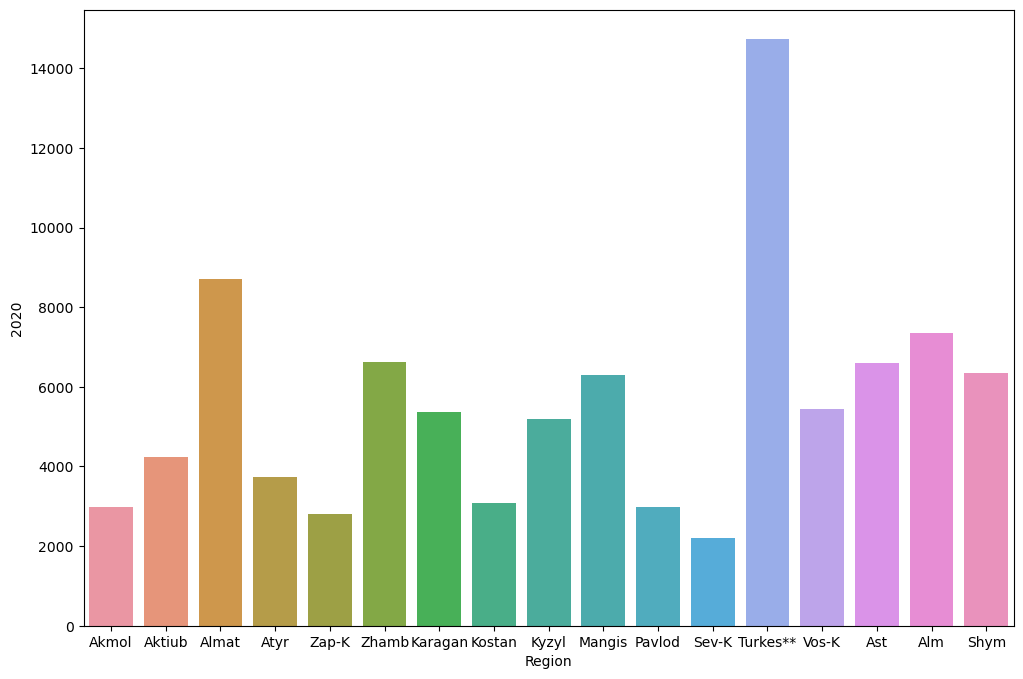

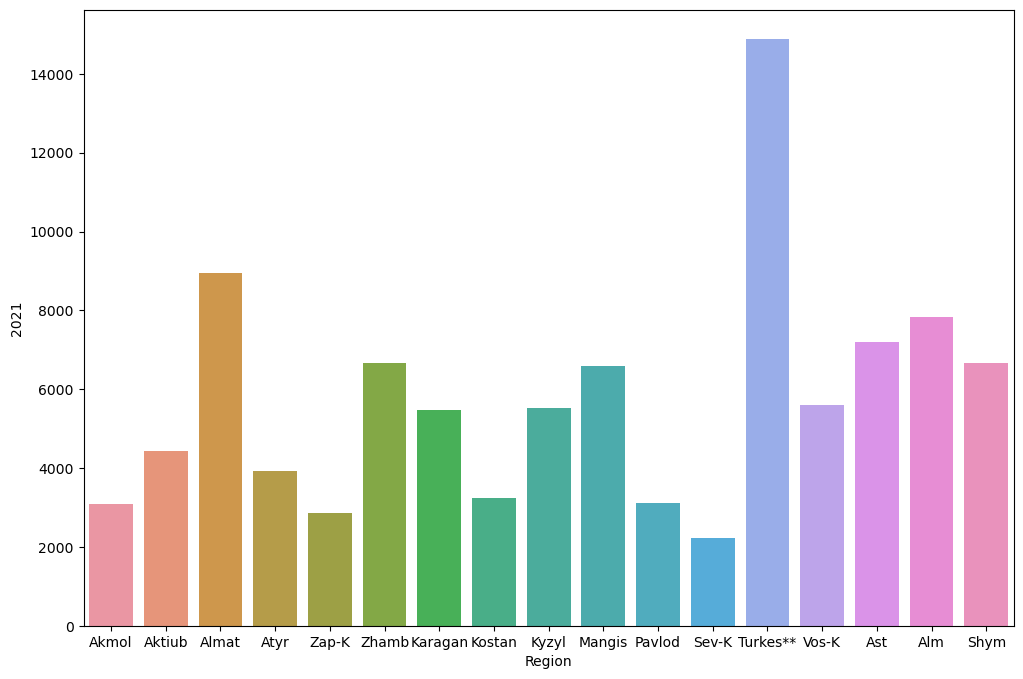

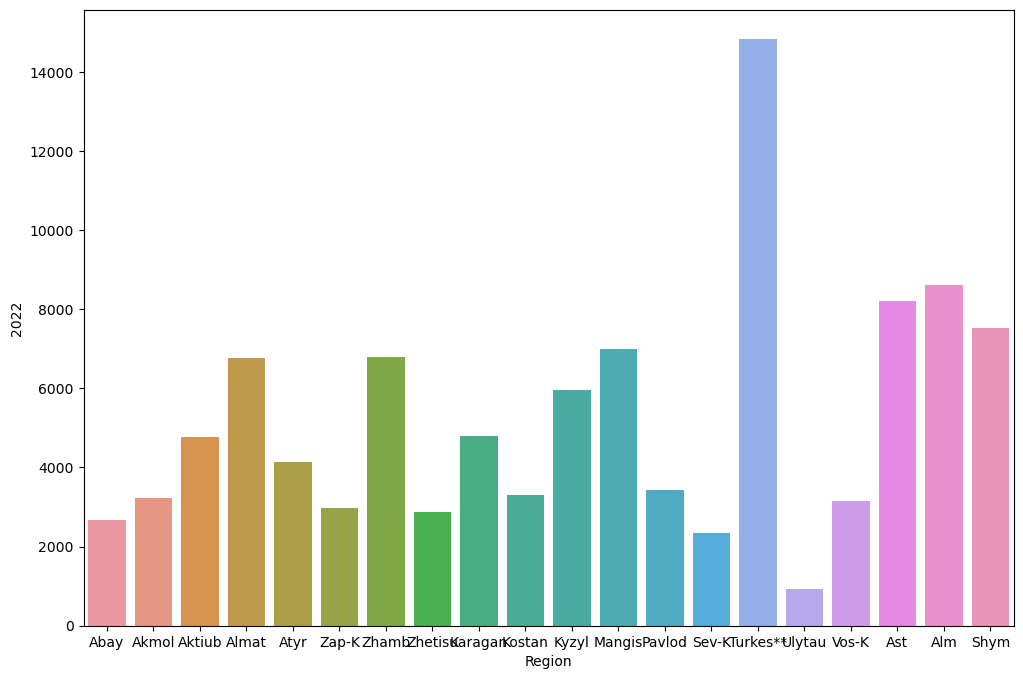

In [13]:
for col in inva_children.columns[1:]:
    inva_children[col] = pd.to_numeric(inva_children[col].str.replace(' ', ''), errors='coerce')

for year in range(2020, 2023):
    temp = inva_children[['Region', str(year)]].drop(index=inva_children.index[0], axis=0).dropna()
    barplot(temp, x='Region', y=str(year))

### Error in children's demography

In [14]:
err = demos_children.drop(columns=['Region']).iloc[0] - demos_children.drop(columns=['Region']).iloc[1:].sum()
err

2011     9519.0
2012     9490.0
2013     8973.0
2014     8037.0
2015     7986.0
2016     7950.0
2017    10724.0
2018    10721.0
2019    10039.0
2020    11079.0
2021    11654.0
2022    15174.0
2023    15925.0
dtype: float64

In [15]:
err/demos_children.drop(columns=['Region']).iloc[0]

2011    0.001962
2012    0.001923
2013    0.001784
2014    0.001560
2015    0.001508
2016    0.001456
2017    0.001907
2018    0.001853
2019    0.001689
2020    0.001813
2021    0.001851
2022    0.002293
2023    0.002363
dtype: float64

### Ratio of disabled children

#### % of children in disabled people population

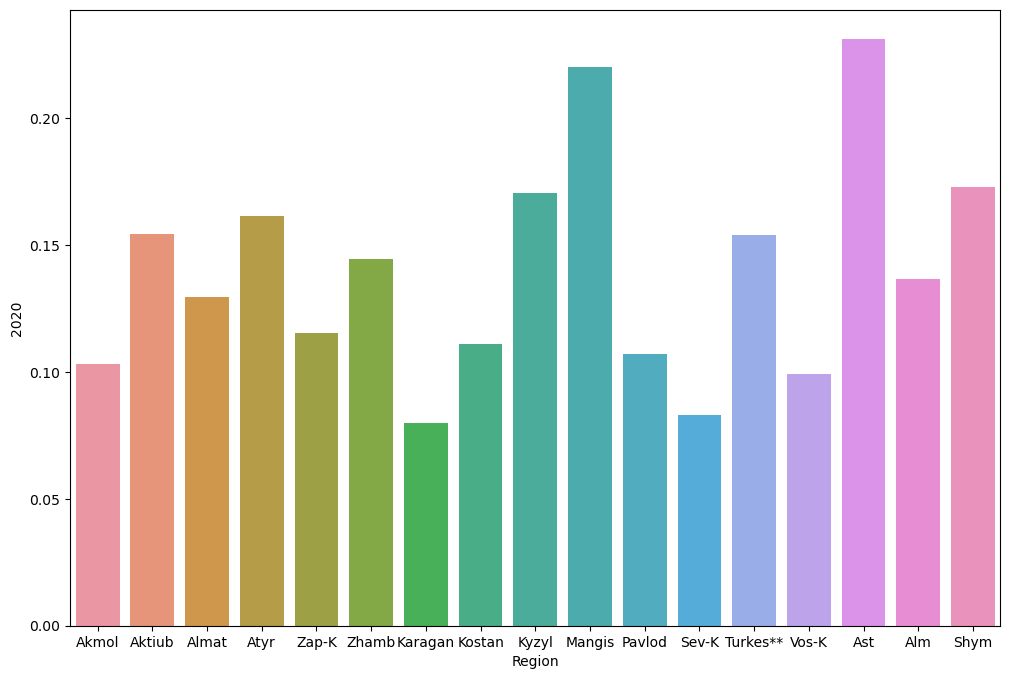

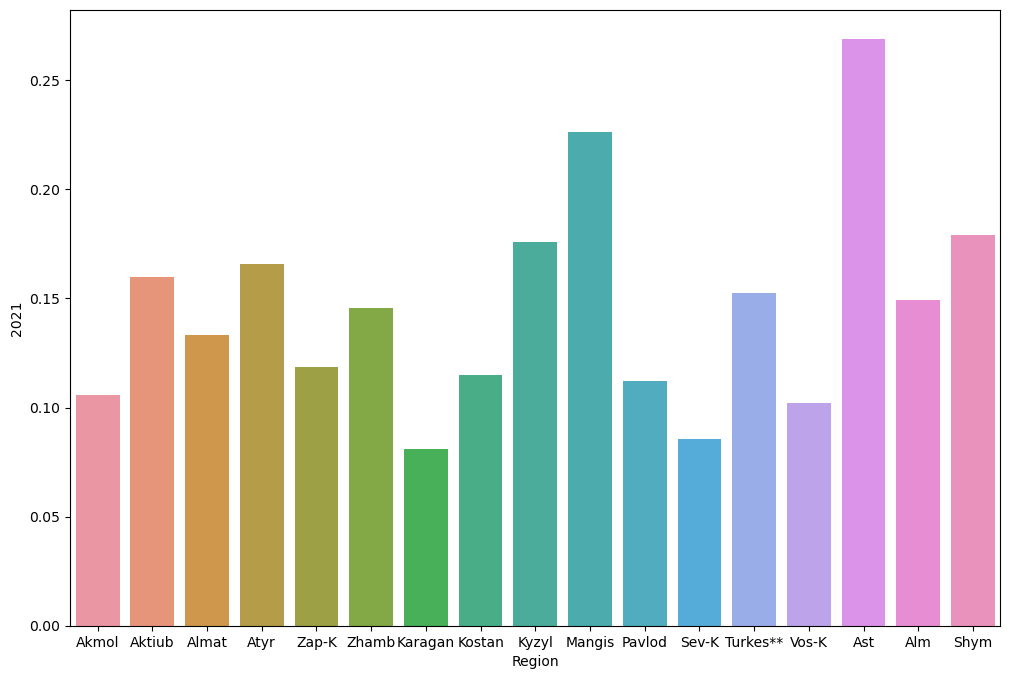

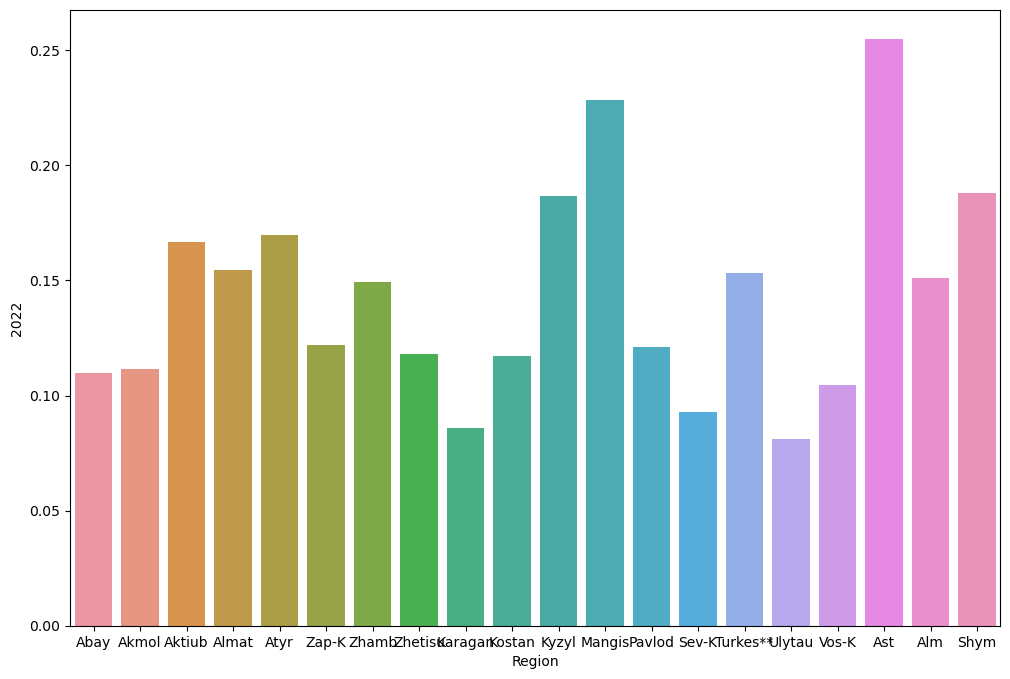

In [16]:
inva_children_percent = inva_children.drop(columns=['Region'])/inva.drop(columns=['Region'])
inva_children_percent['Region'] = inva_children['Region']
for year in range(2020, 2023):
    temp = inva_children_percent[['Region', str(year)]].drop(index=inva_children.index[0], axis=0).dropna()
    barplot(temp, x='Region', y=str(year))

#### % of disabled children in each region

In [17]:
inva_children_ratio = inva_children.copy()
inva_children_ratio = ratio(inva_children, demos_children, inva_children_ratio)
inva_children_ratio.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,18.000000,18.000000,18.000000,18.000000,21.000000
mean,0.012969,0.013398,0.013748,0.014061,0.014194,0.014486,0.015180,0.015055,0.015494,0.015658,0.015843,0.015768
std,0.001765,0.001289,0.001262,0.001244,0.001254,0.001437,0.002517,0.001768,0.002025,0.002206,0.002227,0.002513
min,0.010853,0.011016,0.011342,0.011617,0.011907,0.012637,0.012487,0.012260,0.012281,0.011880,0.011881,0.011923
25%,0.011910,0.012775,0.013203,0.013309,0.013580,0.013605,0.013919,0.013918,0.014331,0.014656,0.014867,0.014283
50%,0.012614,0.013345,0.013690,0.014044,0.013900,0.014011,0.014347,0.014580,0.015107,0.015095,0.015483,0.015756
75%,0.013450,0.014405,0.014876,0.015214,0.015456,0.015363,0.015275,0.015602,0.015975,0.016225,0.016474,0.016665
max,0.017956,0.015231,0.015218,0.015739,0.016148,0.017255,0.023070,0.019984,0.021870,0.022587,0.022673,0.022536


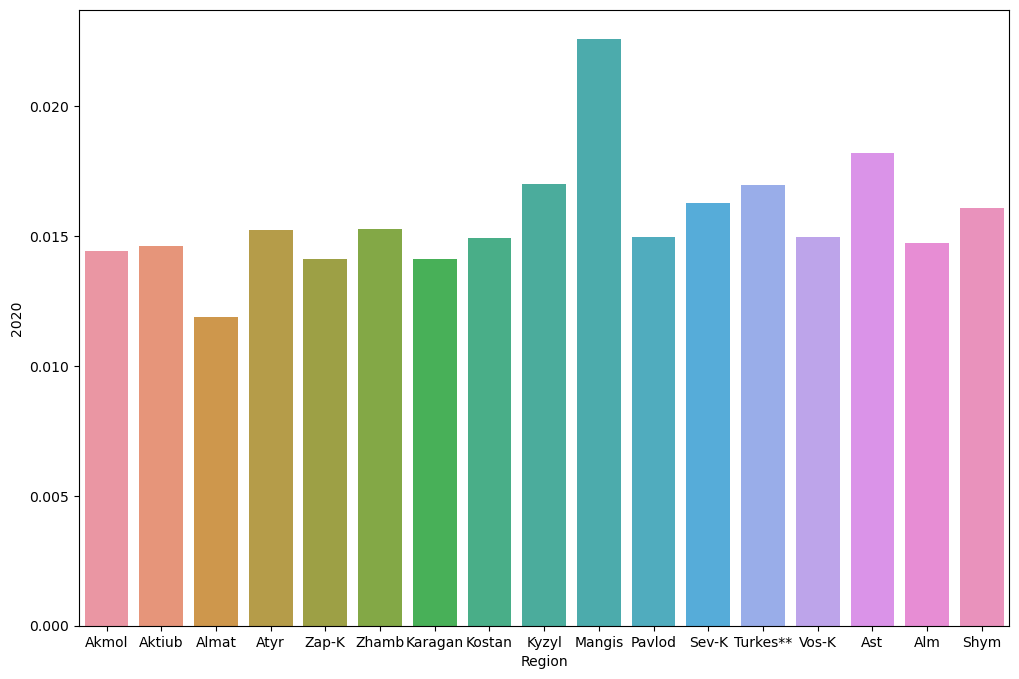

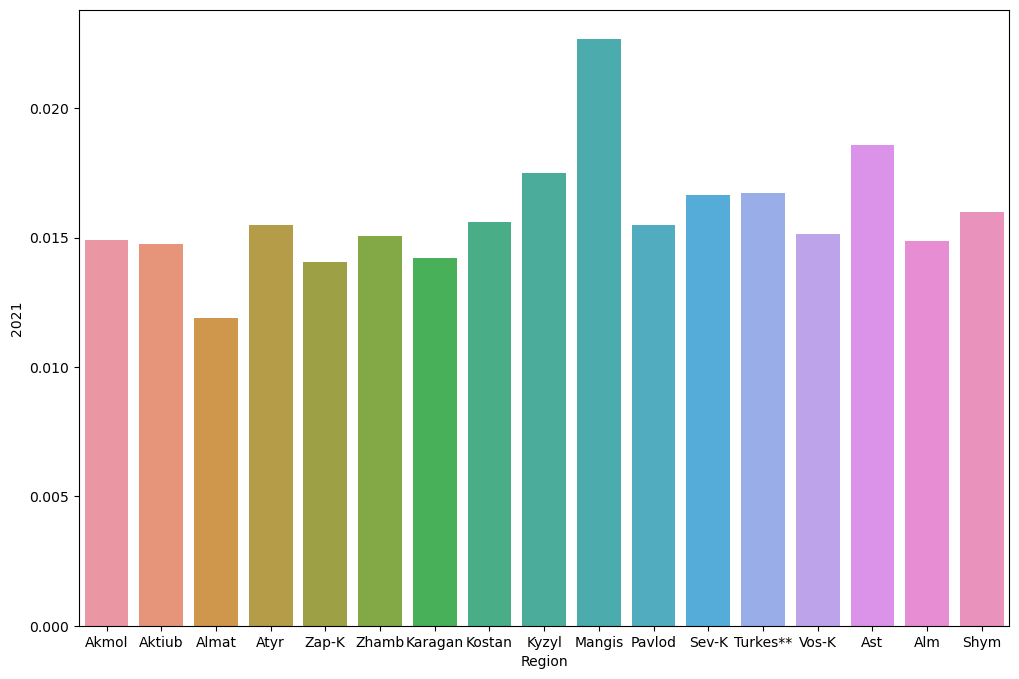

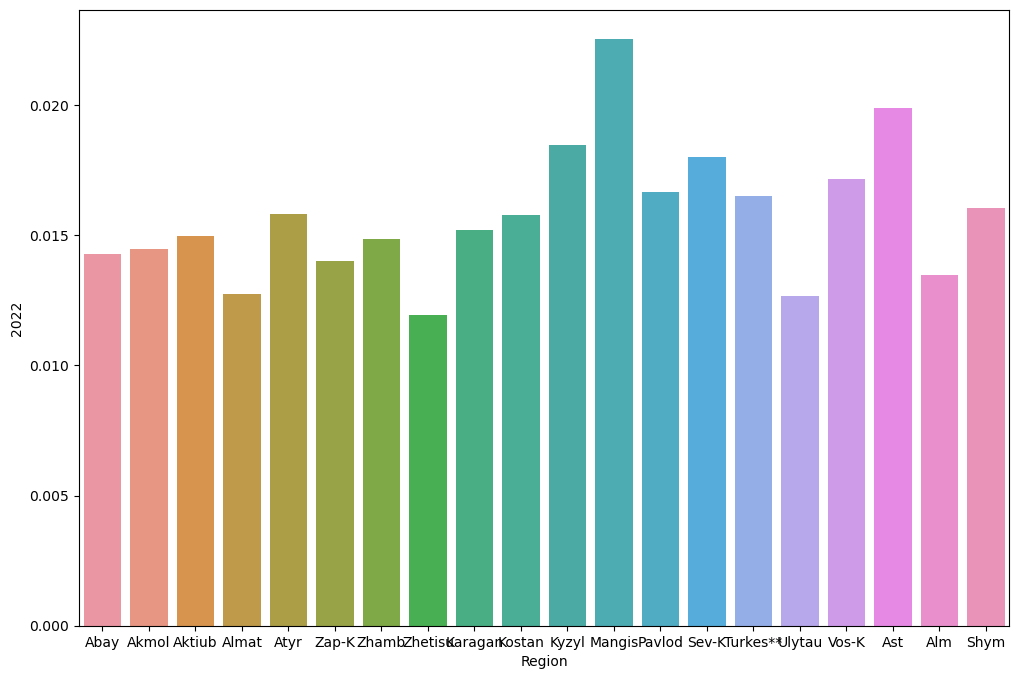

In [18]:
for year in range(2020, 2023):
    temp = inva_children_ratio[['Region', str(year)]].drop(index=inva_children.index[0], axis=0).dropna()
    barplot(temp, x='Region', y=str(year))

<Figure size 2400x640 with 0 Axes>

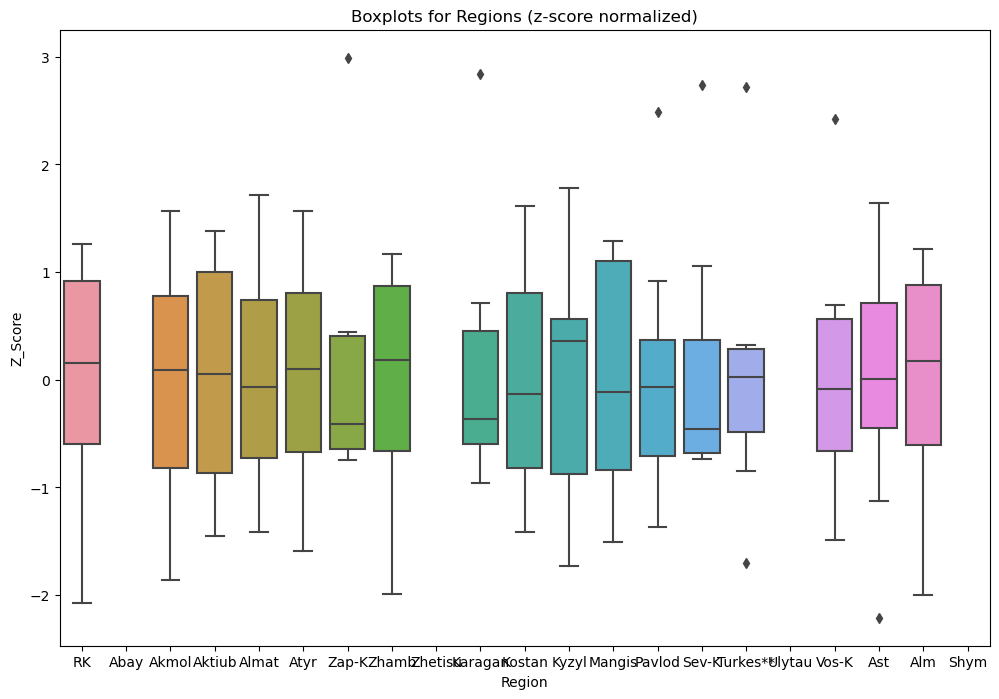

In [19]:
boxplot(inva_children_ratio)

# EDA 2

### Government benefits

In [20]:
benefits['2017'].describe()

count           6
unique          6
top       621 180
freq            1
Name: 2017, dtype: object

In [21]:
benefits['2018'].describe()

count          6
unique         6
top       86 446
freq           1
Name: 2018, dtype: object

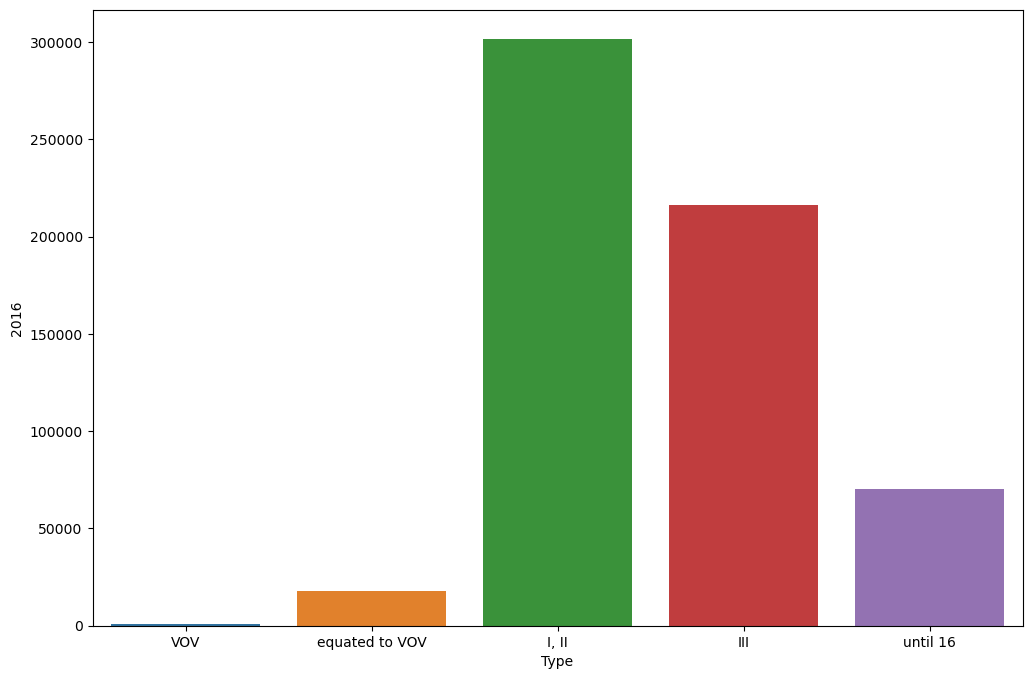

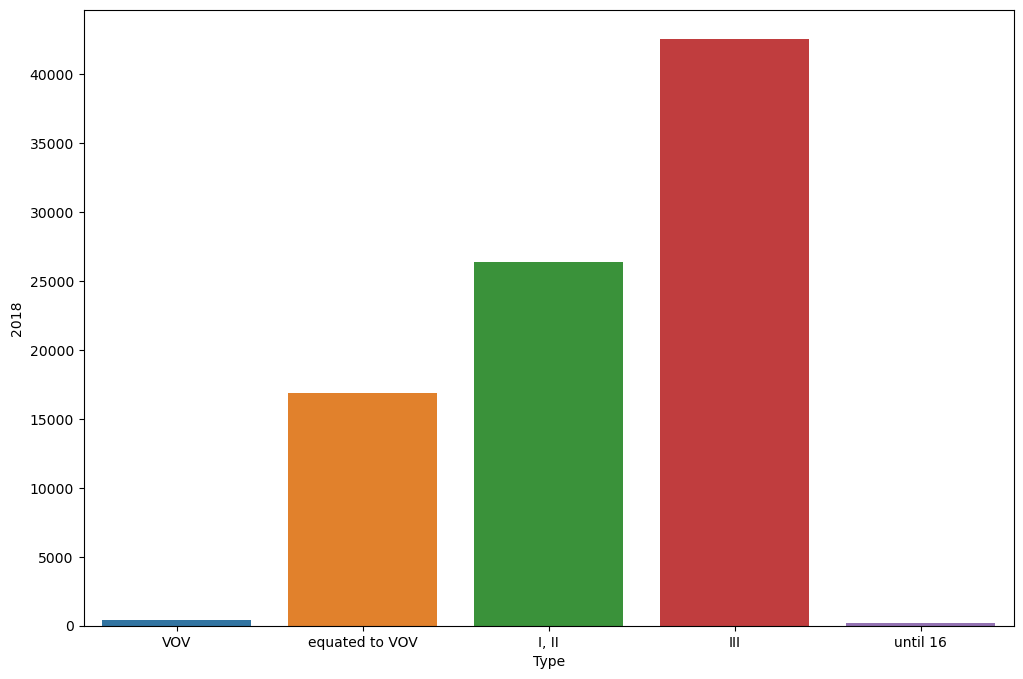

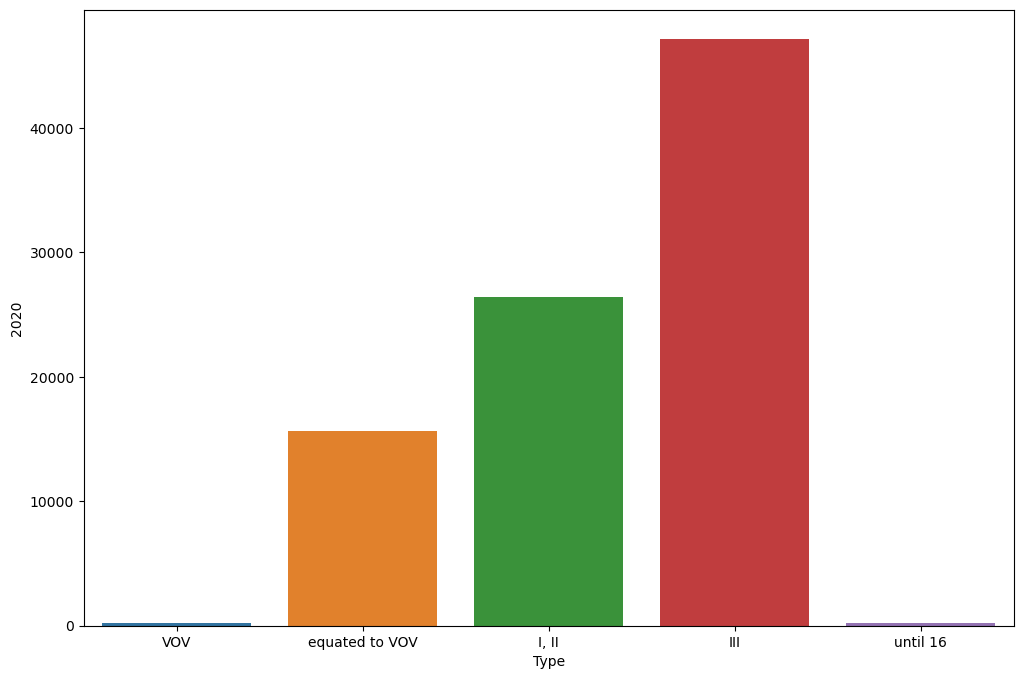

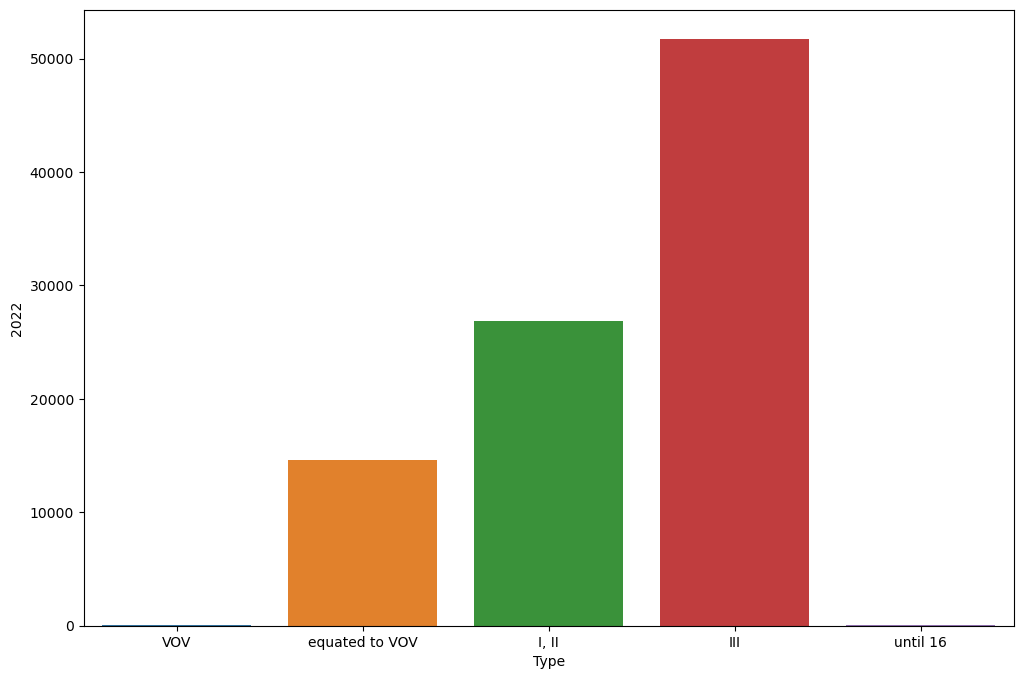

In [22]:
for col in benefits.columns[1:]:
    benefits[col] = pd.to_numeric(benefits[col].str.replace(' ', ''), errors='coerce')

for year in range(2016, 2023, 2):
    temp = benefits.drop(index=inva.index[0], axis=0).dropna()
    barplot(temp, x='Type', y=str(year))

### % of disabled people who get benefits from government

In [23]:
benefits_ratio = benefits.loc[0, '2011':'2022'] / inva.drop(columns = ['Region']).loc[0, '2011':'2022'] 
benefits_ratio

2011     0.94029
2012    0.887348
2013    0.880729
2014    0.903979
2015    0.912451
2016    0.931371
2017    0.937568
2018    0.127122
2019    0.129241
2020    0.128855
2021    0.129763
2022    0.131098
Name: 0, dtype: object

<Axes: >

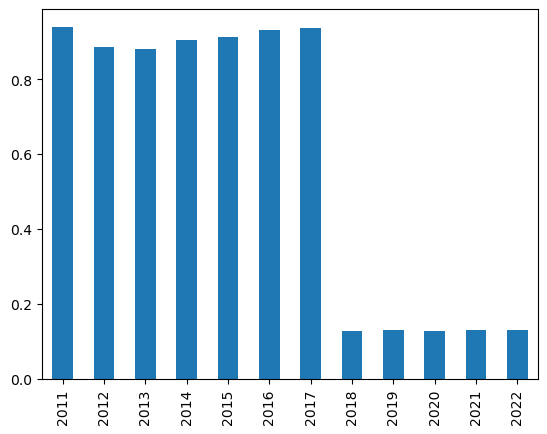

In [24]:
benefits_ratio.plot.bar()